In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [14]:
df = pd.read_csv("./dataset_Facebook.csv", delimiter = ";")

In [23]:
features = ["Category",
            "Page total likes",
            "Type",
            "Post Month",
            "Post Hour",
            "Post Weekday",
            "Paid"]


df[features].head()


,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0


In [4]:
outcomes=  ["Lifetime Post Total Reach",
            "Lifetime Post Total Impressions",
            "Lifetime Engaged Users",
            "Lifetime Post Consumers",
            "Lifetime Post Consumptions",
            "Lifetime Post Impressions by people who have liked your Page",
            "Lifetime Post reach by people who like your Page",
            "Lifetime People who have liked your Page and engaged with your post",
            "comment",
            "like",
            "share",
            "Total Interactions"]

df[outcomes].head()


,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [5]:



# convert a string variable to a categorical one
#types = list(set(df["Type"]))
#to_categorical = {types[i]:i for i in range(len(types))}
#df["Type"] = df["Type"].apply(lambda x: to_categorical[x])

df[["Type"]] = df[["Type"]].apply(LabelEncoder().fit_transform)

df.head()




,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
df = df.dropna()



In [26]:


outcomes_of_interest = ["share"]

X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()

cat_features = ["Category",
            "Type",

            "Paid"]


X_df = pd.get_dummies(X_df, columns = cat_features)

print X_df.head()[["Category_1", "Category_2","Category_3"]].to_latex()

X = X_df.values
y = y_df.values.T[0]




\begin{tabular}{lrrr}
\toprule
{} &  Category\_1 &  Category\_2 &  Category\_3 \\
\midrule
0 &           0 &           1 &           0 \\
1 &           0 &           1 &           0 \\
2 &           0 &           0 &           1 \\
3 &           0 &           1 &           0 \\
4 &           0 &           1 &           0 \\
\bottomrule
\end{tabular}



In [8]:

print X.shape

clf = sklearn.ensemble.AdaBoostRegressor(DecisionTreeRegressor(),n_estimators = 1000)#

print X.shape, y.shape
stdy = y
clf.fit(X,stdy)

print mse(stdy,clf.predict(X))

(495, 13)
(495, 13) (495,)
32.5949494949


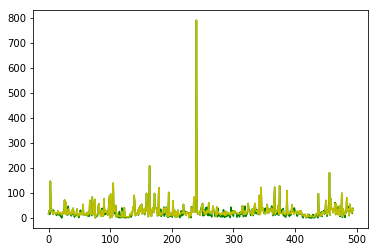

In [9]:
plt.plot(stdy,'g',clf.predict(X),'y')


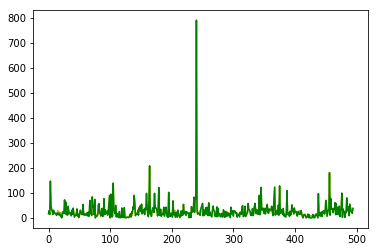

In [10]:
plt.plot(clf.predict(X),'y',stdy,'g')

In [19]:
a = np.array([[139441,     12,      3,      4,      0,      1,      0,      0,
            1,      0,      0,      1,      0]])
clf.predict(a)

array([ 17.])

In [20]:
stdy[0]

17.0

In [16]:
def fun(a,what):
    df = pd.read_csv("./dataset_Facebook.csv", delimiter = ";")
    df = df.dropna()
    outcomes_of_interest = what

    X_df = df[features].copy()
    y_df = df[outcomes_of_interest].copy()

    cat_features = ["Category",
                "Type",

                "Paid"]


    X_df = pd.get_dummies(X_df, columns = cat_features)


    X = X_df.values
    y = y_df.values.T[0]

    clf = sklearn.ensemble.AdaBoostRegressor(DecisionTreeRegressor(),n_estimators = 1000)#

    stdy = y
    clf.fit(X,stdy)
    return clf.predict(a)
    
    

In [36]:
X_df.head()

,Page total likes,Post Month,Post Hour,Post Weekday,Category_1,Category_2,Category_3,Type_Link,Type_Photo,Type_Status,Type_Video,Paid_0.0,Paid_1.0
0,139441,12,3,4,0,1,0,0,1,0,0,1,0
1,139441,12,10,3,0,1,0,0,0,1,0,1,0
2,139441,12,3,3,0,0,1,0,1,0,0,1,0
3,139441,12,10,2,0,1,0,0,1,0,0,0,1
4,139441,12,3,2,0,1,0,0,1,0,0,1,0


In [37]:

a = np.array([[139441,     12,      3,      4,      0,      1,      0,      0,
            1,      0,      0,      1,      0]])
fun(a,["share"])


#"Lifetime Post Total Reach",
#             "Lifetime Post Total Impressions",
#             "Lifetime Engaged Users",
#             "Lifetime Post Consumers",
#             "Lifetime Post Consumptions",
#             "Lifetime Post Impressions by people who have liked your Page",
#             "Lifetime Post reach by people who like your Page",
#             "Lifetime People who have liked your Page and engaged with your post",
#             "comment",
#             "like",
#             "share",
#             "Total Interactions"

array([ 17.])

In [22]:
df[outcomes].head()


,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
